# Home #3.3

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

pd.set_option('display.max_rows', 500)

In [2]:
# read data
rets_mkt = pd.read_excel('data/hw_3_3_data.xlsx', sheet_name='benchmark rets')
rets_spx = pd.read_excel('data/hw_3_3_data.xlsx', sheet_name="s&p500 rets")

## 1. Penalized Regression

In [3]:
X = rets_spx.drop(columns='date')
y = rets_mkt.GLD
model_ols = LinearRegression().fit(X, y)
results_ols = pd.DataFrame({'regressor': X.columns, 'intercept': model_ols.intercept_, 'beta': model_ols.coef_})

a) intercept and betas

In [4]:
# display(results_ols)

b) R-squared

In [5]:
model_ols.score(X, y)

1.0

c) top-10 Factors with largest betas

d) Compute $\beta^{j}\sigma^{j}$ for each regressor

In [6]:
def compute_beta_sigma(spx, results):
    results['abs_beta'] = results.beta.abs()
    for i, row in spx.T.iloc[1:].iterrows():
        results.loc[results.regressor==i, 'sigma'] = row.std()
    results['beta_sigma'] = results['beta']*results['sigma']    
    results['abs_beta_sigma'] = results.beta_sigma.abs()
    return results   

In [7]:
results_ols = compute_beta_sigma(rets_spx, results_ols)
display(results_ols.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']])
display(results_ols.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta', 'sigma', 'beta_sigma']])

,regressor,beta
291,NEM,0.159889
444,XOM,-0.152578
330,PM,0.134020
416,USB,0.132346
283,MSFT,-0.132025
62,BR,0.123529
50,BAX,0.117546
129,DTE,-0.116357
404,TXN,-0.110645
35,APD,-0.106897


,regressor,beta,sigma,beta_sigma
291,NEM,0.159889,0.048772,0.007798
408,UAL,-0.087180,0.076875,-0.006702
444,XOM,-0.152578,0.039123,-0.005969
326,PHM,0.098021,0.055768,0.005466
371,SPG,0.079783,0.065666,0.005239
95,COF,-0.091583,0.056727,-0.005195
416,USB,0.132346,0.039202,0.005188
128,DRI,0.089492,0.057503,0.005146
330,PM,0.134020,0.035893,0.004810
362,SCHW,-0.099300,0.047579,-0.004725


e) Condition number

In [8]:
condition_number = np.linalg.cond(rets_spx.drop(columns=['date']).values); condition_number

212.25385331307297

The high condition number is indicative of presence of multicollinearity which violates OLS assumption 1.

## 2) Ridge Regression

In [9]:
X = rets_spx.drop(columns='date')
y = rets_mkt.GLD
model_ridge = Ridge(alpha=0.5).fit(X, y)
results_ridge = pd.DataFrame({'regressor': X.columns, 'intercept': model_ridge.intercept_, 'beta': model_ridge.coef_})

a) R-squared

In [10]:
model_ridge.score(X, y)

0.7622443309155418

In [11]:
results_ridge = compute_beta_sigma(rets_spx, results_ridge)
display(results_ridge.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']])
display(results_ridge.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta', 'sigma', 'beta_sigma']])

,regressor,beta
291,NEM,0.105331
362,SCHW,-0.034809
160,FCX,0.030162
349,RHI,-0.026028
350,RJF,-0.024630
82,CHTR,0.022171
74,CBRE,-0.020875
307,O,0.020077
367,SLB,0.019675
327,PKG,-0.019215


,regressor,beta,sigma,beta_sigma
291,NEM,0.105331,0.048772,0.005137
160,FCX,0.030162,0.076719,0.002314
142,ENPH,0.016826,0.120485,0.002027
362,SCHW,-0.034809,0.047579,-0.001656
349,RHI,-0.026028,0.044159,-0.001149
367,SLB,0.019675,0.057190,0.001125
350,RJF,-0.024630,0.044070,-0.001085
74,CBRE,-0.020875,0.046461,-0.000970
411,ULTA,-0.016453,0.057896,-0.000953
82,CHTR,0.022171,0.040361,0.000895


## 3) LASSO

In [12]:
model_lasso = Lasso(alpha=2e-5).fit(X, y)
results_lasso = pd.DataFrame({'regressor': X.columns, 'intercept': model_lasso.intercept_, 'beta': model_lasso.coef_})

In [13]:
# display(results_lasso)

In [14]:
model_lasso.score(X, y)

0.7541466465557551

In [15]:
results_lasso = compute_beta_sigma(rets_spx, results_lasso)
display(results_lasso.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']])
display(results_lasso.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta', 'sigma', 'beta_sigma']])

,regressor,beta
291,NEM,0.232283
307,O,0.056246
382,T,-0.055258
362,SCHW,-0.052780
350,RJF,-0.046686
207,IFF,-0.033776
237,LDOS,0.032328
367,SLB,0.031621
74,CBRE,-0.031235
349,RHI,-0.030106


,regressor,beta,sigma,beta_sigma
291,NEM,0.232283,0.048772,0.011329
362,SCHW,-0.052780,0.047579,-0.002511
307,O,0.056246,0.042242,0.002376
350,RJF,-0.046686,0.044070,-0.002057
367,SLB,0.031621,0.057190,0.001808
142,ENPH,0.014089,0.120485,0.001698
382,T,-0.055258,0.030550,-0.001688
74,CBRE,-0.031235,0.046461,-0.001451
326,PHM,0.024947,0.055768,0.001391
160,FCX,0.017994,0.076719,0.001381


In [16]:
non_zero_regressors = results_lasso.loc[results_lasso.beta != 0]
print(f"Number of non-zero regressors: {len(non_zero_regressors)}")

Number of non-zero regressors: 75


## 4. Comparaison

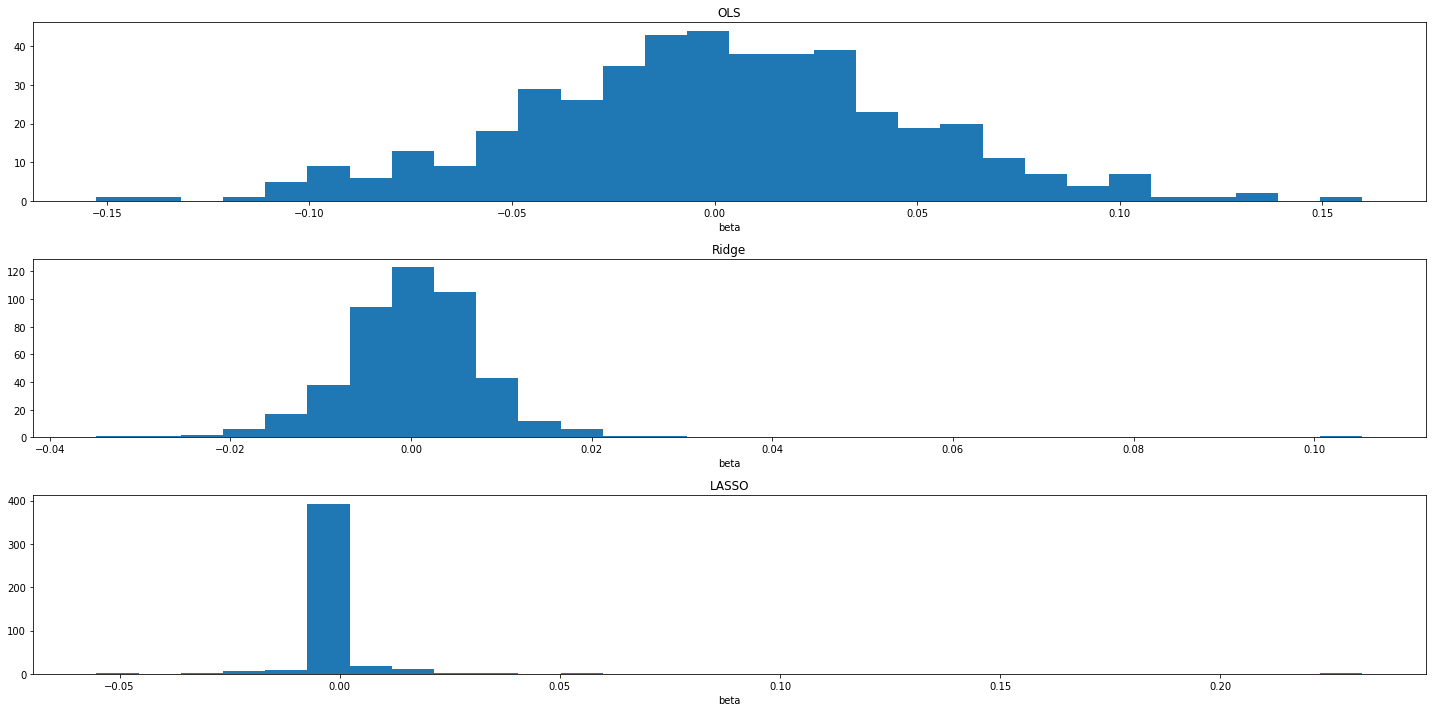

In [17]:
# histogram
fig, axis = plt.subplots(3, 1, figsize=(20, 10))
axis[0].hist(results_ols.beta, bins=30)
axis[0].set_xlabel('beta')
axis[0].set_title('OLS')

axis[1].hist(results_ridge.beta, bins=30)
axis[1].set_xlabel('beta')
axis[1].set_title('Ridge')

axis[2].hist(results_lasso.beta, bins=30)
axis[2].set_xlabel('beta')
axis[2].set_title('LASSO')

fig.tight_layout()

## 5. Cross Validation

In [18]:
X_train, y_train = rets_spx.loc[rets_spx.date.dt.year < 2021].drop(columns='date'), rets_mkt.loc[rets_mkt.date.dt.year < 2021].drop(columns='date').GLD
X_test, y_test = rets_spx.loc[rets_spx.date.dt.year >= 2021].drop(columns='date'), rets_mkt.loc[rets_mkt.date.dt.year >= 2021].drop(columns='date').GLD

In [19]:
model_lasso_cv = LassoCV().fit(X_train, y_train)
model_lasso_cv.alpha_

7.887365550464517e-05

In [20]:
model_ridge_cv = RidgeCV().fit(X_train, y_train)
model_ridge_cv.alpha_

0.1

# 6. OOS predictions

In [21]:
score_oos_lasso = model_lasso_cv.score(X_test, y_test)
score_oos_ridge = model_ridge_cv.score(X_test, y_test)
print(f"Lasso OOS R2: {score_oos_lasso:.2f}\nRidge OOS R2: {score_oos_ridge:.2f}")

Lasso OOS R2: 0.51
Ridge OOS R2: 0.32
